In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [3]:
df = pd.read_csv("Weather-related disease prediction.csv")
df


,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826000,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628000,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800000,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254000,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162000,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack


In [4]:
df['prognosis'].value_counts()


prognosis
Heart Attack    1013
Migraine         941
Influenza        658
Heat Stroke      338
Malaria          330
Stroke           329
Eczema           327
Dengue           322
Common Cold      321
Arthritis        311
Sinusitis        310
Name: count, dtype: int64

In [5]:
df.head()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


In [6]:
df.tail()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
5199,100,1,38.021000,0.750000,18.300000,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Eczema


In [7]:
df.shape


(5200, 51)

In [8]:
df.describe()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,...,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,51.383269,0.511731,19.943117,0.744873,10.708818,0.155385,0.065769,0.040000,0.101731,0.062885,...,0.030769,0.035192,0.032500,0.032692,0.033077,0.029615,0.037115,0.066346,0.035192,0.038077
std,26.625863,0.499910,11.414905,0.142860,5.686331,0.362306,0.247902,0.195978,0.302323,0.242779,...,0.172708,0.184283,0.177341,0.177847,0.178855,0.169540,0.189063,0.248910,0.184283,0.191400
min,1.000000,0.000000,-15.125000,0.370833,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,12.184500,0.624479,6.414508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,20.017500,0.750000,10.152500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.000000,28.465250,0.860000,15.061550,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,40.996000,1.000000,31.303096,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_features.tolist())
print("Categorical columns:", categorical_features.tolist())


NameError: name 'X' is not defined

In [10]:
le = LabelEncoder()

df['prognosis'] = le.fit_transform(df['prognosis'])

In [11]:
X = df.drop('prognosis', axis=1)
Y= df['prognosis']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [19]:
from sklearn.metrics import classification_report, accuracy_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9855769230769231
              precision    recall  f1-score   support

   Arthritis       1.00      1.00      1.00        58
 Common Cold       0.91      0.98      0.94        59
      Dengue       0.98      0.98      0.98        58
      Eczema       1.00      1.00      1.00        68
Heart Attack       1.00      0.99      1.00       192
 Heat Stroke       0.97      1.00      0.99        71
   Influenza       0.99      0.96      0.97       136
     Malaria       1.00      0.98      0.99        61
    Migraine       0.98      1.00      0.99       201
   Sinusitis       1.00      1.00      1.00        57
      Stroke       0.99      0.95      0.97        79

    accuracy                           0.99      1040
   macro avg       0.98      0.99      0.98      1040
weighted avg       0.99      0.99      0.99      1040



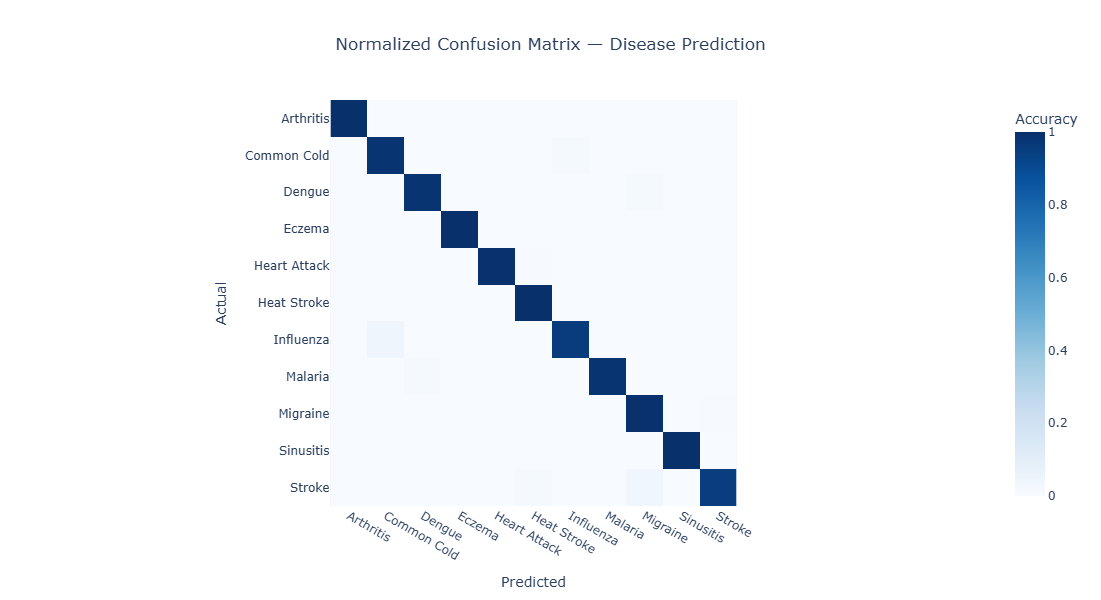

In [20]:
import plotly.express as px
cm = confusion_matrix(y_test, y_pred, normalize='true')  # normalized for better view
fig = px.imshow(cm, 
                x=le.classes_, 
                y=le.classes_, 
                color_continuous_scale='Blues',
                title='Normalized Confusion Matrix — Disease Prediction',
                labels=dict(x="Predicted", y="Actual", color="Accuracy"))
fig.update_layout(width=700, height=600, title_x=0.5)
fig.show()
fig.write_html("Confusion_Matrix_Disease_Prediction.html")


In [ ]:
import joblib

# Save model and label encoder
joblib.dump(model, 'model.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("✅ Model and encoder saved successfully!")
